<a href="https://colab.research.google.com/github/psiudo/NumericalMethods/blob/main/BungeeJumpEquation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
g = 9.81
m = 68.1
cd = 0.25

t = np.arange(0, 20, 0.01)

v = np.sqrt(m*g / cd) * np.tanh(np.sqrt(g * cd / m) * t)

In [ ]:
g = 9.81  # 중력 가속도 (m/s^2)
m = 70    # 질량 (kg)
cd = 0.25 # 저항 계수 (kg/m)

# 이론적 속도 계산
t1 = np.arange(0, 15.01, 0.01)
v1 = np.sqrt(g * m / cd) * np.tanh(np.sqrt(g * cd / m) * t1)

# 오일러 방법으로 속도 계산
def euler_method_bungee(t_range, v0, dt):
    t = np.arange(t_range[0], t_range[1] + dt, dt)
    v = np.zeros(len(t))
    v[0] = v0

    for i in range(1, len(t)):
        v[i] = v[i-1] + (g - (cd/m) * v[i-1]**2) * dt

    return t, v

t_range = (0, 15)
v0 = 0
dt = 0.01

t, v2 = euler_method_bungee(t_range, v0, dt)

# t1과 v1은 이론적인 값이고, t와 v2는 오일러 방법으로 얻은 값입니다.


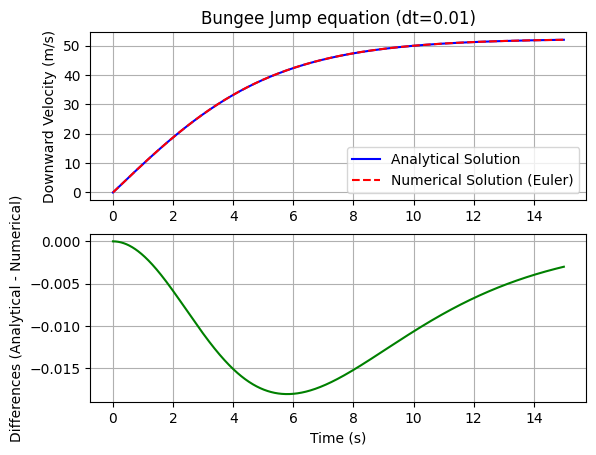

In [ ]:
# 그래프 그리기
plt.subplot(2, 1, 1)
plt.plot(t1, v1, 'b', label='Analytical Solution')
plt.plot(t, v2, 'r--', label='Numerical Solution (Euler)')
plt.title('Bungee Jump equation (dt=0.01)')
plt.ylabel('Downward Velocity (m/s)')
plt.grid(True)
plt.legend()

# 그래프 2: 차이 계산
min_length = min(len(v1), len(v2))  # v1과 v2의 최소 길이 찾기
plt.subplot(2, 1, 2)
plt.plot(t[:min_length], v1[:min_length] - v2[:min_length], 'g')
plt.xlabel('Time (s)')
plt.ylabel('Differences (Analytical - Numerical)')
plt.grid(True)

plt.show()